Medical Abbreviation Expander - Analysis Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

Load dataset

In [4]:
data_path = "../data/analysis_data.csv"

if not os.path.exists(data_path):
    raise FileNotFoundError("No analysis_data.csv found! Run the app once first.")

df = pd.read_csv(data_path)
df.head()

,text_length,use_embeddings,timestamp,abbr,expansion,confidence
0,66,False,2025-10-15 16:30:41,SOB,Shortness of Breath,0.95
1,66,False,2025-10-15 16:30:41,BP,Blood Pressure,0.95
2,66,False,2025-10-15 16:30:41,HTN,Hypertension,0.95
3,66,False,2025-10-15 16:30:41,DM,Diabetes Mellitus,0.95
4,66,False,2025-10-15 16:30:41,ACE,[UNKNOWN: ACE],0.00


Basic Data

In [5]:
print("Total abbreviations processed:", len(df))
print("Unique abbreviations found:", df['abbr'].nunique())
print("\nTop 5 most frequent abbreviations:")
print(df['abbr'].value_counts().head(5))

Total abbreviations processed: 5
Unique abbreviations found: 5

Top 5 most frequent abbreviations:
abbr
SOB    1
BP     1
HTN    1
DM     1
ACE    1
Name: count, dtype: int64


Frequency of Abbreviations

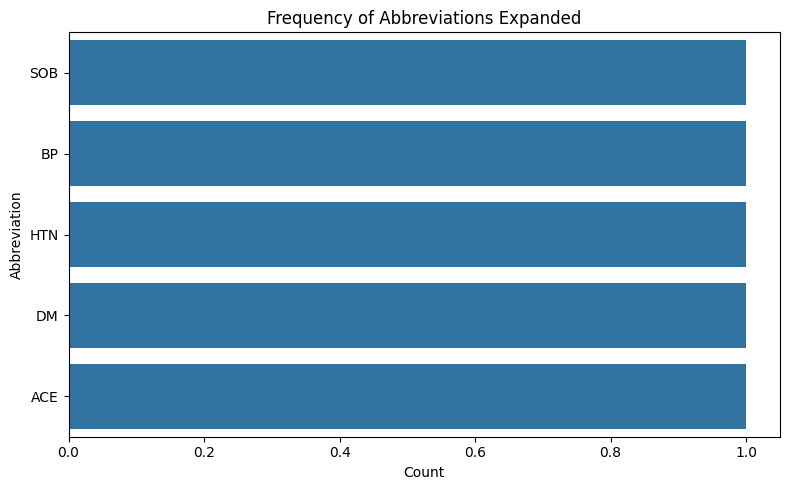

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(y='abbr', data=df, order=df['abbr'].value_counts().index)
plt.title("Frequency of Abbreviations Expanded")
plt.xlabel("Count")
plt.ylabel("Abbreviation")
plt.tight_layout()
plt.show()


Confidence Distribution

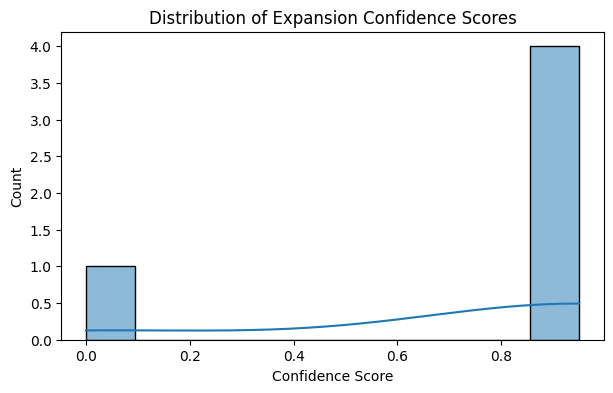

In [7]:
plt.figure(figsize=(7,4))
sns.histplot(df['confidence'], bins=10, kde=True)
plt.title("Distribution of Expansion Confidence Scores")
plt.xlabel("Confidence Score")
plt.ylabel("Count")
plt.show()


Average Confidence per Abbreviation

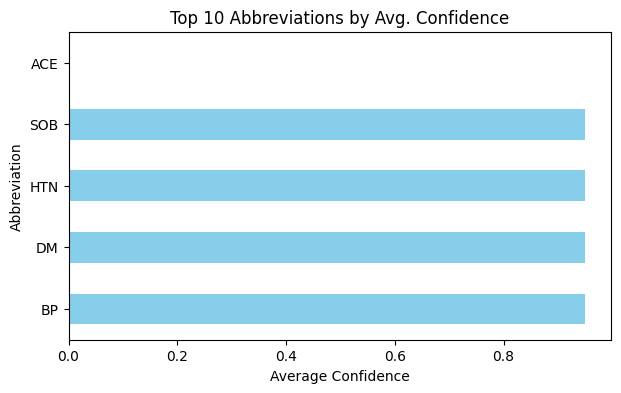

In [8]:
avg_conf = df.groupby('abbr')['confidence'].mean().sort_values(ascending=False).head(10)
avg_conf.plot(kind='barh', figsize=(7,4), color='skyblue')
plt.title("Top 10 Abbreviations by Avg. Confidence")
plt.xlabel("Average Confidence")
plt.ylabel("Abbreviation")
plt.show()

Embedding Mode Usage

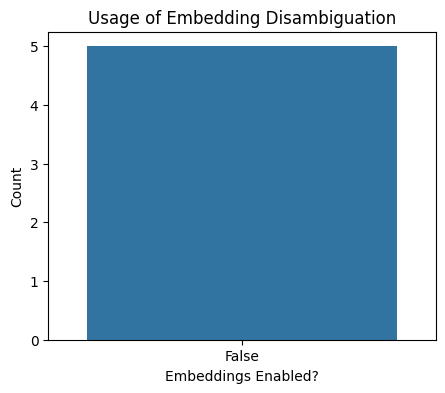

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x='use_embeddings', data=df)
plt.title("Usage of Embedding Disambiguation")
plt.xlabel("Embeddings Enabled?")
plt.ylabel("Count")
plt.show()

Text Length vs Confidence

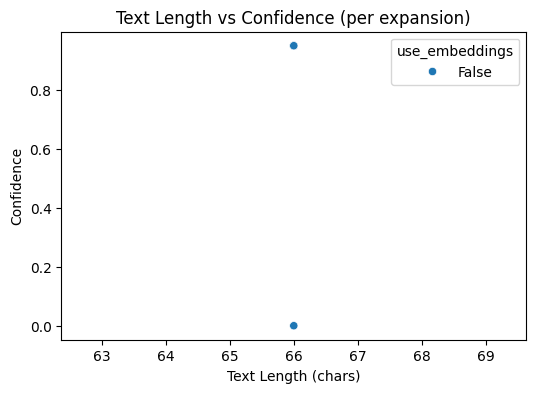

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='text_length', y='confidence', hue='use_embeddings')
plt.title("Text Length vs Confidence (per expansion)")
plt.xlabel("Text Length (chars)")
plt.ylabel("Confidence")
plt.show()


Correlation Heatmap

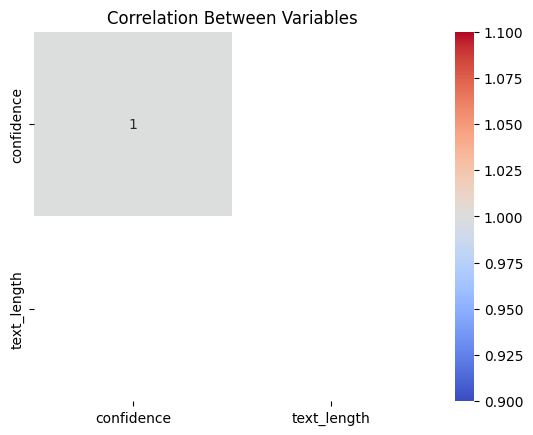

In [11]:
corr = df[['confidence', 'text_length']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Variables")
plt.show()

Summary_Report

In [12]:
summary = df.groupby('abbr').agg(
    total=('abbr', 'count'),
    avg_conf=('confidence', 'mean')
).sort_values('total', ascending=False)

summary.to_csv("../data/summary_report.csv")
print("Summary report saved to data/summary_report.csv")

Summary report saved to data/summary_report.csv
